In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.svm             # For SVC class
import sklearn.preprocessing   # For scale function
import sklearn.metrics         # for accuracy_score
import pickle                  # save the trained models
import seaborn as sns

### Loading and splitting the data.

In [2]:
data_downSampling = np.genfromtxt('dataset_down_sampling.csv', delimiter=",")
data_upSampling = np.genfromtxt('dataset_up_sampling.csv', delimiter=",")

In [3]:
data_upSampling.shape

(25090, 12)

In [5]:
X_train_down, X_test_down, y_train_down, y_test_down = sklearn.model_selection.train_test_split(data_downSampling[:, :-1], 
                                                                                    data_downSampling[:,-1],
                                                                                    test_size=0.2, random_state=0)
X_train_up, X_test_up, y_train_up, y_test_up = sklearn.model_selection.train_test_split(data_upSampling[:, :-1], 
                                                                                    data_upSampling[:,-1],
                                                                                    test_size=0.2, random_state=0)

### Display the sizes after splitting.

In [6]:
print('Down Sampling.')
print('X_train size: ', X_train_down.shape)
print('y_train size: ', y_train_down.shape)
print('X_test size: ', X_test_down.shape)
print('X_test size: ', y_test_down.shape)

print('\nUp Sampling.')
print('X_train size: ', X_train_up.shape)
print('y_train size: ', y_train_up.shape)
print('X_test size: ', X_test_up.shape)
print('X_test size: ', y_test_up.shape)

Down Sampling.
X_train size:  (6051, 11)
y_train size:  (6051,)
X_test size:  (1513, 11)
X_test size:  (1513,)

Up Sampling.
X_train size:  (20072, 11)
y_train size:  (20072,)
X_test size:  (5018, 11)
X_test size:  (5018,)


### Load the trained models
ONLY IF YOU HAVE RAN THE WHOLE CODE ONCE BEFROE

In [7]:
svm_down_l = pickle.load(open('svmSave/svm_down_l.sav', 'rb'))
svm_down_p = pickle.load(open('svmSave/svm_down_p.sav', 'rb'))
svm_down_r = pickle.load(open('svmSave/svm_down_r.sav', 'rb'))
svm_up_l = pickle.load(open('svmSave/svm_up_l.sav', 'rb'))
svm_up_p = pickle.load(open('svmSave/svm_up_p.sav', 'rb'))
svm_up_r = pickle.load(open('svmSave/svm_up_r.sav', 'rb'))

C:\Users\nalve\anaconda3\envs\venv\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator SVC from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Define evaluation function.

In [8]:
def evaluate (X_test, y_test, model):
    y_predict = model.predict(X_test)
    accuracy = sklearn.metrics.accuracy_score(y_test, y_predict)*100
    precision = sklearn.metrics.precision_score(y_test, y_predict)*100
    recall = sklearn.metrics.recall_score(y_test, y_predict)*100
    roc = sklearn.metrics.roc_auc_score(y_test,y_predict)*100
    print('Accuracy = %.2f%%' %accuracy)
    print('Precision = %.2f%%' %precision)
    print('Recall = %.2f%%' %recall)
    print('ROC = %.2f%%' %roc)
    
    return y_predict, accuracy, precision, recall, roc

### Down sampling training.

In [8]:
# svm_down_l = sklearn.svm.SVC(kernel='linear').fit(X_train_down, y_train_down)

In [9]:
y_down_l_predict, accuracy_down_l, precision_down_l, recall_down_l, roc_down_l = evaluate (X_test_down, y_test_down, svm_down_l)

Accuracy = 65.96%
Precision = 69.03%
Recall = 56.99%
ROC = 65.90%


In [10]:
# svm_down_p = sklearn.svm.SVC(kernel='poly', degree=2, coef0=3, gamma=1).fit(X_train_down, y_train_down)

In [10]:
y_down_p_predict, accuracy_down_p, precision_down_p, recall_down_p, roc_down_p = evaluate (X_test_down, y_test_down, svm_down_p)

Accuracy = 65.90%
Precision = 66.16%
Recall = 64.05%
ROC = 65.88%


In [12]:
# svm_down_r = sklearn.svm.SVC(kernel='rbf', gamma=1).fit(X_train_down, y_train_down)

In [11]:
y_down_r_predict, accuracy_down_r, precision_down_r, recall_down_r, roc_down_r = evaluate (X_test_down, y_test_down, svm_down_r)

Accuracy = 59.42%
Precision = 55.74%
Recall = 88.55%
ROC = 59.63%


### Up sampling training.

In [14]:
# svm_up_l = sklearn.svm.SVC(kernel='linear').fit(X_train_up, y_train_up)

In [12]:
y_up_l_predict, accuracy_up_l, precision_up_l, recall_up_l, roc_up_l = evaluate (X_test_up, y_test_up, svm_up_l)

Accuracy = 67.74%
Precision = 73.67%
Recall = 56.12%
ROC = 67.84%


In [16]:
# svm_up_p = sklearn.svm.SVC(kernel='poly', degree=2, coef0=3, gamma=1).fit(X_train_up, y_train_up)

In [13]:
y_up_p_predict, accuracy_up_p, precision_up_p, recall_up_p, roc_up_p = evaluate (X_test_up, y_test_up, svm_up_p)

Accuracy = 67.58%
Precision = 68.49%
Recall = 66.19%
ROC = 67.59%


In [18]:
# svm_up_r = sklearn.svm.SVC(kernel='rbf', gamma=1).fit(X_train_up, y_train_up)

In [14]:
y_up_r_predict, accuracy_up_r, precision_up_r, recall_up_r, roc_up_r = evaluate (X_test_up, y_test_up, svm_up_r)

Accuracy = 94.78%
Precision = 96.03%
Recall = 93.52%
ROC = 94.79%


### Save the trained models

In [20]:
# svm_down_l_file = 'svm_down_l.sav'
# pickle.dump(svm_down_l, open(svm_down_l_file, 'wb'))
# svm_down_p_file = 'svm_down_p.sav'
# pickle.dump(svm_down_p, open(svm_down_p_file, 'wb'))
# svm_down_r_file = 'svm_down_r.sav'
# pickle.dump(svm_down_r, open(svm_down_r_file, 'wb'))
# svm_up_l_file = 'svm_up_l.sav'
# pickle.dump(svm_up_l, open(svm_up_l_file, 'wb'))
# svm_up_p_file = 'svm_up_p.sav'
# pickle.dump(svm_up_p, open(svm_up_p_file, 'wb'))
# svm_up_r_file = 'svm_up_r.sav'
# pickle.dump(svm_up_r, open(svm_up_r_file, 'wb'))

### Define plotting function.

In [15]:
svm_n = ['DS Linear', 'DS Poly', 'DS RBF', 'US Linear', 'US Poly', 'US RBF'] # DS: Down Sampling, US: Up Sampling.

def plot(values, title, color):
    plt.figure()
    plt.bar(svm_n, values, color=color)
    plt.ylim(0,100)
    plt.ylabel('%s %%' %title)
    plt.title('SVM %s(s) with different kernels' %title);

### Comparison

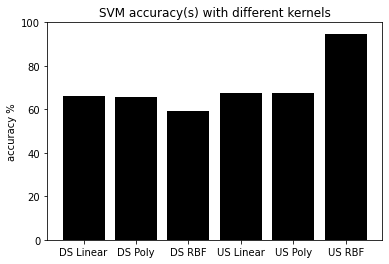

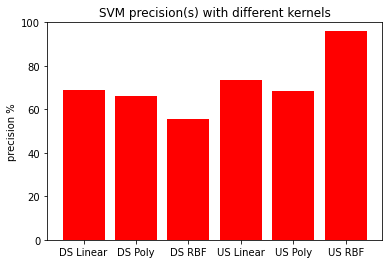

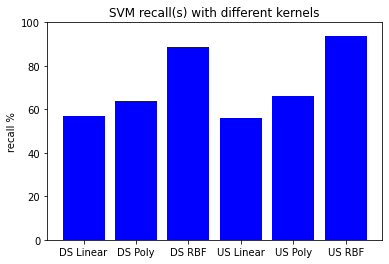

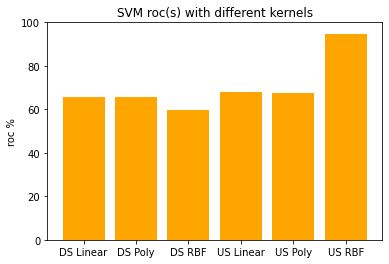

In [16]:
accuracies = [accuracy_down_l, accuracy_down_p, accuracy_down_r, accuracy_up_l, accuracy_up_p, accuracy_up_r]
plot(accuracies, 'accuracy', 'k')
precisions = [precision_down_l, precision_down_p, precision_down_r, precision_up_l, precision_up_p, precision_up_r]
plot(precisions, 'precision', 'r')
recalls = [recall_down_l, recall_down_p, recall_down_r, recall_up_l, recall_up_p, recall_up_r]
plot(recalls, 'recall', 'b')
rocs = [roc_down_l, roc_down_p, roc_down_r, roc_up_l, roc_up_p, roc_up_r]
plot(rocs, 'roc', 'orange')

### Confusion matrix of the best model
Up sampling RBF kernel

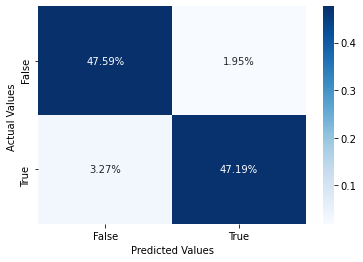

In [23]:
cf_matrix = sklearn.metrics.confusion_matrix(y_test_up, y_up_r_predict)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

### Determining the most contributing features

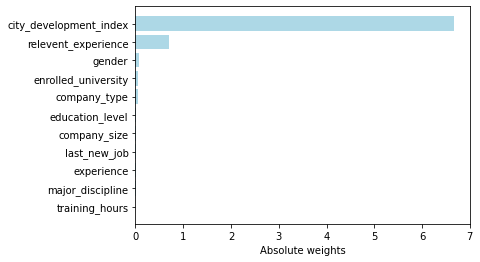

In [25]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(np.arange(len(names)), imp, align='center',color='lightblue')
    plt.yticks(np.arange(len(names)), names)
    plt.xlabel('Absolute weights')
    plt.show()

features_names = ['city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level',
                  'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours']
f_importances(np.abs(svm_up_l.coef_).flatten(), features_names)